<a href="https://colab.research.google.com/github/emerson1000/notebooks/blob/main/compradores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación tenemos una base de datos de marketing que busca determinar el comportamiento de compradores de un local basado en los datos de venta mostrados.
El objetivo es determinar mediante clusterización grupos de compradores y ejecutar planes de marketing que maximice las ventas en función de cada uno.

In [ ]:
# Importando las librerías

import pandas as pd #Manejaremos los datos con pandas
import numpy as np #Haremos cálculos matemáticos con numpy
import matplotlib.pyplot as plt #Haremos gráficos con matplotlib
from matplotlib import style #Con style haremos gráficos con estilo
import seaborn as sns #Haremos gráficos con seaborn
import missingno as msno # Para visualizar patrones de datos faltantes con missingno
from scipy import stats # Para funciones estadísticas con scipy
from sklearn.decomposition import PCA # Para el análisis de componentes principales (PCA) en scikit-learn
from sklearn.pipeline import make_pipeline # Para construir tuberías (pipelines) en scikit-learn
from sklearn.preprocessing import StandardScaler #Para escalar los datos en scikit-learn
from sklearn.preprocessing import scale # Para escalar los datos con la función scale en scikit-learn
from sklearn.datasets import make_classification # Para generar conjuntos de datos de clasificación en scikit-learn
from sklearn.cluster import KMeans # Para realizar el algoritmo de K-Means clustering en scikit-learn
from sklearn.impute import SimpleImputer # Para la imputación de valores faltantes en scikit-learn

import warnings #Menejaremos advertencias
warnings.filterwarnings('ignore') #Cuando aparezca una advertencia, la ignoraremos

In [ ]:
# Cargando los datos
df = pd.read_csv("evaluacion_mkt_campaign.csv",delimiter=";")
#Se lee archivo csv, delimitando las columnas con ;
# Eliminando la variable ID
df = df.drop(["ID"],axis = 1)

# Mostramos los datos
df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,66,1,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,69,1,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,58,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,39,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,42,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,56,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,77,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,42,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,67,1,0


In [ ]:
print(df.describe()) #Mostramos las principales estadísticas básicas de la base de datos
#Podemos ver que la variable ingresos tiene datos faltantes

              Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    2216.000000  2240.000000  2240.000000  2240.000000      2240.000000   
mean    52247.251354    49.109375   303.935714    26.302232       166.950000   
std     25173.076661    28.962453   336.597393    39.773434       225.715373   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     35303.000000    24.000000    23.750000     1.000000        16.000000   
50%     51381.500000    49.000000   173.500000     8.000000        67.000000   
75%     68522.000000    74.000000   504.250000    33.000000       232.000000   
max    666666.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.

In [ ]:
# Revisaremos los datos y el tipo que tienen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2240 non-null   int64  
 2   MntWines             2240 non-null   int64  
 3   MntFruits            2240 non-null   int64  
 4   MntMeatProducts      2240 non-null   int64  
 5   MntFishProducts      2240 non-null   int64  
 6   MntSweetProducts     2240 non-null   int64  
 7   MntGoldProds         2240 non-null   int64  
 8   NumDealsPurchases    2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   int64  
 13  Age                  2240 non-null   int64  
 14  Seniority            2240 non-null   int64  
 15  Children             2240 non-null   i

In [ ]:
# Realizando un resumen estadístico de las variables de la bbdd
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,54.194196,0.208036,0.0
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069,0.405993,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.0
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,46.000000,0.000000,0.0
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,53.000000,0.000000,0.0
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,0.000000,0.0
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,130.000000,1.000000,0.0


Ahora que hemos visto un análisis básico de la base de datos, analizaremos las columnas del comportamiento de compra en búsqueda de anomalías, nos fijaremos en un comportamientos anómalos correspondientes al 5% de la muestra, si lo encontramos, entonces lo descartaremos
(Limpieza de datos anómalos)

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# En caso de existir datos nulos, imputaremos estos con la media de cada columna
imputer = SimpleImputer(strategy='mean') #Imputar datos faltantes con la media
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
#Nuevo dataframe con la media de cada columna en datos faltantes
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=None))
# Construimos un pipeline que primero escala los datos con StandardScaler y luego aplica PCA sin reducción de dimensiones
pca_pipeline.fit(X=df_imputed)
# Ajustamos el modelo PCA a los datos imputados y escalados para aprender la transformación de los datos originales a componentes principales


Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipeline.named_steps['pca']
# Extraemos el objeto PCA del pipeline utilizando su nombre asignado ('pca') y lo asignamos a la variable 'modelo_pca'

In [ ]:
# Calculando la varianza explicada
varianza_explicada = np.cumsum(pca_pipeline.named_steps['pca'].explained_variance_ratio_)
# El método explained_variance_ratio_ devuelve la proporción de la varianza explicada por cada componente principal
# La función np.cumsum() realiza una suma acumulativa, lo que nos da la varianza explicada acumulativa para cada número de componentes principales.
varianza_explicada
# varianza_explicada es un array que contiene la varianza explicada acumulativa para cada componente principal.



array([0.37759395, 0.49653076, 0.59605261, 0.66286848, 0.72157152,
       0.7664486 , 0.80825191, 0.84341754, 0.87433302, 0.90220451,
       0.92802583, 0.95025834, 0.96940777, 0.9854822 , 1.        ,
       1.        ])

El array resultante nos genera la varianza explicada para cada iteración, podemos ver que con 12 componentes principales, la varianza se explica en mas de un 95%

In [ ]:
proyecciones = pca_pipeline.transform(df_imputed)
# Utilizamos el método transform del pipeline para proyectar los datos originales (df_imputed) en el espacio de las componentes principales
reconstruccion = pca_pipeline.inverse_transform(proyecciones)
# Utilizamos el método inverse_transform del pipeline para reconstruir los datos originales desde las proyecciones en el espacio de
#las componentes principales.

reconstruccion = pd.DataFrame(
                    reconstruccion,
                    columns = df_imputed.columns,
                    index   = df_imputed.index)
# Creamos un nuevo DataFrame llamado 'reconstruccion' utilizando los datos reconstruidos.
# Mantenemos las mismas columnas y el mismo índice que el DataFrame original (df_imputed).


In [ ]:
print('Valores reconstruidos')
#Imprimimos en pantalla las palabras Valores Reconstruidos
display(reconstruccion.head(3))
#Mostramos en pantalla las 3 primeras filas de cada variable del dataframe reconstruccion
print('Valores originales')
#Imprimimos en pantalla las palabras Valores originales
display(df.head(3))
#Mostramos en pantalla las 3 primeras filas de cada variable del dataframe df
#Comparamos

Valores reconstruidos


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,58138.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,66.0,1.000000e+00,0.0
1,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,69.0,1.000000e+00,0.0
2,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,58.0,2.775558e-16,0.0


Valores originales


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,66,1,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,69,1,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,58,0,0


In [ ]:
# Los valores son casi iguales con excepción de los ceros, por la aproximación del cálculo

In [ ]:
# Observamos que con 12 componentes, tenemos un 95,02% de variabilidad explicada
varianza_explicada

array([0.37759395, 0.49653076, 0.59605261, 0.66286848, 0.72157152,
       0.7664486 , 0.80825191, 0.84341754, 0.87433302, 0.90220451,
       0.92802583, 0.95025834, 0.96940777, 0.9854822 , 1.        ,
       1.        ])

In [ ]:
# Crearemos un pipeline con escalado estándar y PCA con 12 componentes principales
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=12))
# Construiremos un pipeline que primero escala los datos con StandardScaler y luego aplica PCA con reducción a 12 componentes principales.
pca_pipeline.fit(X=df_imputed)
# Ajustaremos el modelo PCA a los datos imputados y escalados, pero esta vez con reducción de dimensiones a 12 componentes principales.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=12))])

In [ ]:
# Proyectar los datos
proyecciones = pca_pipeline.transform(df_imputed)
# Utilizamos el método transform del pipeline para proyectar los datos originales (df_imputed) en el espacio de las 12 componentes principales.


In [ ]:
# Reconstrucción
# Reconstruir los datos originales desde las proyecciones en el espacio de las 12 componentes principales
reconstruccion = pca_pipeline.inverse_transform(proyecciones)
# Utilizamos el método inverse_transform del pipeline para reconstruir los datos originales desde las proyecciones en el espacio de las 5 componentes principales.
reconstruccion = pd.DataFrame(
                    reconstruccion,
                    columns = df_imputed.columns,
                    index   = df_imputed.index
                )
# Creamos un nuevo DataFrame llamado 'reconstruccion' utilizando los datos reconstruidos. Mantenemos las mismas columnas y el mismo índice que el DataFrame original (df_imputed).


In [ ]:
# Error cuadrático medio de reconstrucción
error_reconstruccion = reconstruccion - df_imputed
# Calculamos la diferencia entre los datos reconstruidos y los datos originales para cada observación.
error_reconstruccion = error_reconstruccion**2
# Elevamos al cuadrado cada diferencia para dar más peso a los errores mayores.
error_reconstruccion = error_reconstruccion.mean(axis=1)
# Calculamos el promedio del error cuadrático medio para cada observación tomando la media a lo largo de las columnas (axis=1).


Ya con nuestro error de reconstrución calculado, podemos usarlo como criterio para detección de anomalias, en donde aquellas observaciones con mayor score que el resto, son denominadas como anómalas

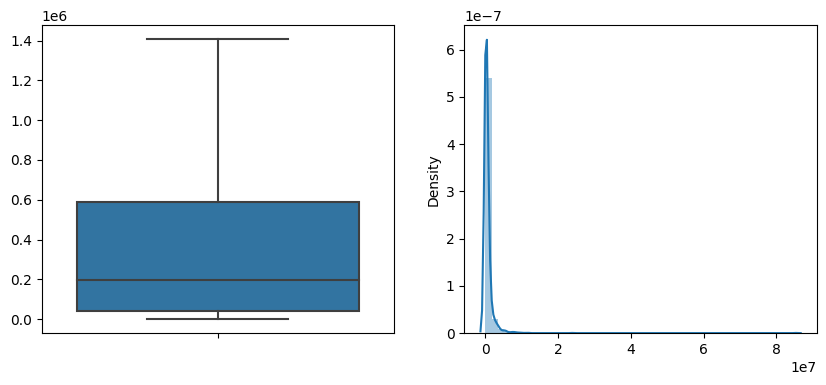

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
## Crear una figura con dos subgráficos en una fila
plt.subplot(1, 2, 1)
# Crear una figura con dos subgráficos en una fila
sns.boxplot(y=error_reconstruccion,showfliers=False)
# Creamos un diagrama de caja (boxplot) para visualizar la distribución del error de reconstrucción
# 'showfliers=False' evita que se muestren los valores atípicos.
plt.subplot(1, 2, 2)
# Subgráfico 2: Histograma de la distribución del error de reconstrucción

sns.distplot(error_reconstruccion);
# Creamos un histograma para visualizar la distribución del error de reconstrucción.


Aquí tenemos múltiples criterios para decidir que valores son atípicos: en general se toma el último 3% o 5%, o se pueden tomar al igual que el cálculo de un boxplot, con Q3 + 1.5·RIC

In [ ]:
# caso 1
filtro1 = error_reconstruccion>np.percentile(error_reconstruccion, 95)
# Creamos un filtro que selecciona las observaciones cuyo error de reconstrucción está por encima del percentil 95.

#caso 2
q3, q1 = np.percentile(error_reconstruccion, [75, 25])
iqr = q3 - q1
# Calculamos el rango intercuartílico (IQR) como la diferencia entre q3 y q1.

filtro2 = error_reconstruccion>(q3 + 1.5* iqr)
# Creamos un filtro que selecciona las observaciones cuyo error de reconstrucción está por encima de q3 + 1.5 veces el IQR.


In [ ]:
ochenta = varianza_explicada > 0.8
# Creamos una respuesta booleana que es True para las componentes principales donde la varianza explicada es mayor al 80%.

noventa = varianza_explicada > 0.9
# Creamos una respuesta booleana que es True para las componentes principales donde la varianza explicada es mayor al 90%.

noventaycinco = varianza_explicada > 0.95
# Creamos una respuesta booleana que es True para las componentes principales donde la varianza explicada es mayor al 95%.

print(noventa)
#Imprimimos las respueta para el umbral de varianza explicada mayor a 90%

[False False False False False False False False False  True  True  True
  True  True  True  True]


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


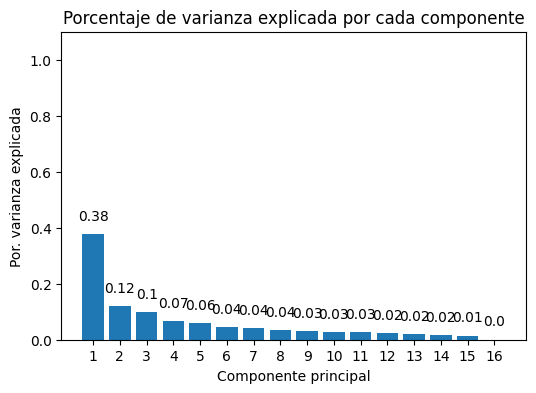

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')

# Crear una figura con un solo eje (subplot)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Crear un gráfico de barras para visualizar el porcentaje de varianza explicada por cada componente
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

# Anotar cada barra con su porcentaje de varianza explicada
for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
# Configurar el eje x con los números de componente principal
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
# Ajustar los límites del eje y entre 0 y 1.1 para una mejor visualización
ax.set_ylim(0, 1.1)

# Configurar el título y etiquetas de los ejes
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.37759395 0.49653076 0.59605261 0.66286848 0.72157152 0.7664486
 0.80825191 0.84341754 0.87433302 0.90220451 0.92802583 0.95025834
 0.96940777 0.9854822  1.         1.        ]


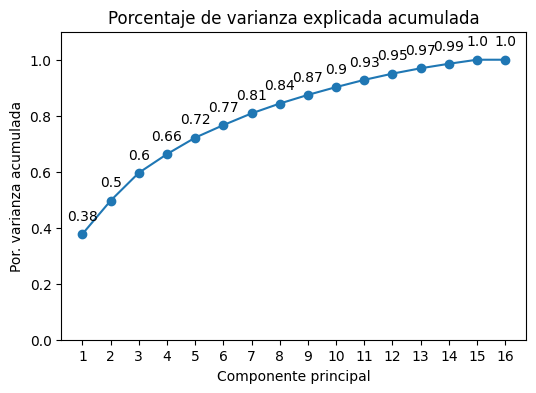

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
#Calcularemos el porcentaje de la varianza explicada

print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

# Crearemos una figura con un solo eje (subplot)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Crearemos un gráfico de líneas para visualizar el porcentaje de varianza explicada acumulada por cada componente principal
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

# Anotaremos cada punto con su porcentaje de varianza explicada acumulada
for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
# Ajustaremos los límites del eje y entre 0 y 1.1 para una mejor visualización
ax.set_ylim(0, 1.1)
# Configuraremos el eje x con los números de componente principal
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)

# Configuraremos el título y etiquetas de los ejes
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
# Normalizando los datos
# utilizaremos el método Min-Max Scaling con un rango pequeño (0.01) para evitar la división por cero
df_norm = (df_imputed - df_imputed.min()) / (df_imputed.max() - df_imputed.min() + 0.01)
#Definición de metodo min-max scaling (x-xmin)/(x-max-m-min) con el fator infinitesimal para evitar desviación por cero

#Mostraremos los datos normalizados
df_norm


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,0.084832,0.585799,0.425315,0.442189,0.316520,0.664067,0.334588,0.243087,0.199867,0.296187,0.357015,0.307456,0.349825,0.378604,0.990099,0.0
1,0.067095,0.383800,0.007368,0.005025,0.003478,0.007722,0.003802,0.016574,0.133245,0.037023,0.035702,0.153728,0.249875,0.407727,0.990099,0.0
2,0.105097,0.262600,0.285330,0.246219,0.073623,0.428555,0.079845,0.116019,0.066622,0.296187,0.071403,0.768640,0.199900,0.300942,0.000000,0.0
3,0.037471,0.262600,0.007368,0.020099,0.011594,0.038609,0.011406,0.013812,0.133245,0.074047,0.000000,0.307456,0.299850,0.116494,0.000000,0.0
4,0.085065,0.949399,0.115873,0.216070,0.068405,0.177599,0.102658,0.041435,0.333111,0.185117,0.107105,0.461184,0.249875,0.145617,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.089472,0.464600,0.474880,0.216070,0.105507,0.162156,0.448652,0.682302,0.133245,0.333210,0.107105,0.307456,0.249875,0.281526,0.000000,0.0
2236,0.093669,0.565599,0.271934,0.000000,0.017391,0.000000,0.000000,0.022099,0.466356,0.296187,0.071403,0.384320,0.349825,0.485390,0.990099,0.0
2237,0.083092,0.919099,0.608167,0.241194,0.125796,0.123547,0.045626,0.066297,0.066622,0.074047,0.107105,0.999231,0.299850,0.145617,0.000000,0.0
2238,0.101536,0.080800,0.286669,0.150746,0.124057,0.308868,0.114064,0.168504,0.133245,0.222140,0.178508,0.768640,0.149925,0.388312,0.990099,0.0


In [ ]:
# Calculando qué tan similares son los individuos dentro de los Clusters

wcss = []

for i in range(1,17):
  kmeans = KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(df_norm) # Aplico K-Means a la base de datos
  wcss.append(kmeans.inertia_)

  # El rango va desde 1 a 17, quiero 16 clusters cómo máximo, se le coloca siempre al número que quiero que llegue +1.
  # Máximo de 300 iteraciones para cada kmeans

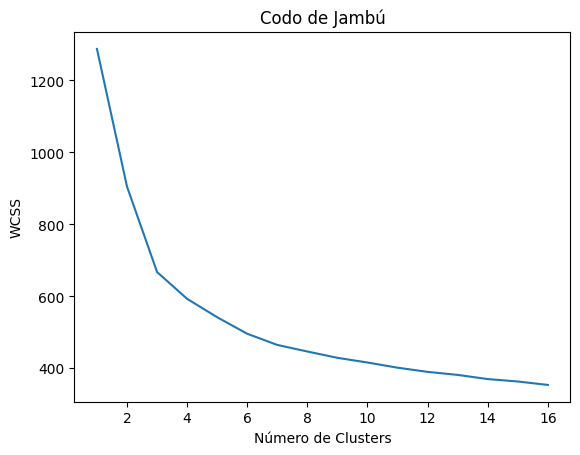

In [ ]:
# Graficando los resultados

plt.plot(range(1,17), wcss)
#Graficaremos el comportamiento en 17 clusters

#Título y nombre etiquetas
plt.title("Codo de Jambú")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS") # WCSS es un indicador de qué tan similares son los individuos dentro de los clusters
#Mostrar resultados en consola
plt.show()

El valor de WCSS comenzó a disminuir de manera drástica desde el número de cluster 3, por lo que esta es la cantidad óptima de cluster a formar.

In [ ]:
# Aplicando el método K-Means a la base de datos

clustering = KMeans(n_clusters= 3, max_iter=300) # Crea el modelo
clustering.fit(df_norm) # Aplica  el modelo a la base de datos

KMeans(n_clusters=3)

In [ ]:
# Agregando la clasificación al archivo original

df_norm['KMeans_Clusters'] = clustering.labels_ # Los resultados del clustering se guardan en labels_ dentro del modelo
df_norm.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children,KMeans_Clusters
0,0.084832,0.585799,0.425315,0.442189,0.316520,0.664067,0.334588,0.243087,0.199867,0.296187,0.357015,0.307456,0.349825,0.378604,0.990099,0.0,2
1,0.067095,0.383800,0.007368,0.005025,0.003478,0.007722,0.003802,0.016574,0.133245,0.037023,0.035702,0.153728,0.249875,0.407727,0.990099,0.0,2
2,0.105097,0.262600,0.285330,0.246219,0.073623,0.428555,0.079845,0.116019,0.066622,0.296187,0.071403,0.768640,0.199900,0.300942,0.000000,0.0,0
3,0.037471,0.262600,0.007368,0.020099,0.011594,0.038609,0.011406,0.013812,0.133245,0.074047,0.000000,0.307456,0.299850,0.116494,0.000000,0.0,1
4,0.085065,0.949399,0.115873,0.216070,0.068405,0.177599,0.102658,0.041435,0.333111,0.185117,0.107105,0.461184,0.249875,0.145617,0.000000,0.0,1


In [ ]:
# Visualización de los clusters

# Aplicando el análisis de componentes principales para darnos una idea de cómo se formaron los clusters

from sklearn.decomposition import PCA
# Importamos la clase PCA desde sklearn.decomposition
pca = PCA(n_components=3)
# Creamos un objeto PCA que retendrá las primeras 3 componentes principales.

df_mkt = pca.fit_transform(df_norm)
# Aplicamos el método fit_transform al DataFrame normalizado, lo que ajusta el modelo PCA y transforma los datos a las 3 componentes principales.

pca_mkt_df = pd.DataFrame(data = df_mkt, columns =['Componente_1', 'Componente_2', 'Componente_3'])
# Creamos un nuevo DataFrame llamado pca_mkt_df que contiene las componentes principales y renombramos las columnas.

pca_nombres_mkt = pd.concat([pca_mkt_df, df_norm[['KMeans_Clusters']]], axis=1)
# Concatenamos las componentes principales con la columna 'KMeans_Clusters' del DataFrame original para tener una visión completa de cómo se formaron los clusters.

pca_nombres_mkt
# Mostramos el DataFrame que contiene las componentes principales y la información de los clusters.


,Componente_1,Componente_2,Componente_3,KMeans_Clusters
0,1.189060,0.805073,0.076681,2
1,1.389662,-0.023962,-0.102777,2
2,-0.956064,0.262116,-0.244850,0
3,0.053093,-0.422553,-0.228078,1
4,-0.014359,-0.114444,0.448850,1
...,...,...,...,...
2235,-0.949457,0.220346,-0.027435,0
2236,1.349203,0.214802,0.071388,2
2237,-0.988695,0.338108,0.411665,0
2238,1.236519,0.638128,-0.426787,2


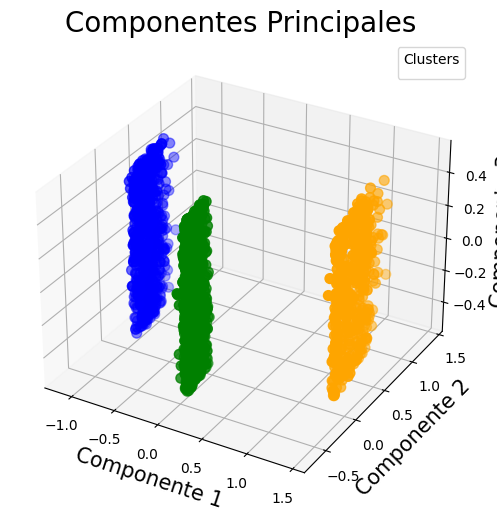

In [ ]:
# Creamos una figura tridimensional y ejes 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Configuraramos etiquetas y título de los ejes
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_zlabel('Componente 3', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

# Definimos el tema de colores para los clusters
color_theme = np.array(["blue", "green", "orange"])

# Scatter plot tridimensional
scatter = ax.scatter(
    xs=pca_nombres_mkt.Componente_1,
    ys=pca_nombres_mkt.Componente_2,
    zs=pca_nombres_mkt.Componente_3,
    c=color_theme[pca_nombres_mkt.KMeans_Clusters],
    s=50
)
# Creamos un scatter plot tridimensional con las componentes principales en los ejes x, y, y z.
# Cada punto se colorea según el cluster al que pertenece y se ajusta el tamaño de los puntos (s=50).

# Mostramos la leyenda para los clusters
ax.legend(*scatter.legend_elements(), title="Clusters")

# Mostramos el gráfico tridimensional
plt.show()
# Mostramos el gráfico tridimensional resultante.


#Conclusiones
###Hemos aplicado el modelo PCA y K-means a una base de datos de compra de artículos en una tienda, en base a variables numéricas de mas de 2000 usuarios, determinándose así que el modelo mas útil para aplicar la predicción de compras y establecer campañas de marketing diferenciadas es k-means
###En este sentido, se definió como óptimo, clusterizar 3 tipos de clientes, y así, aplicar campañas de marketing dirigidas a cada tipo.
###Basado en los datos, podemos ver que la mayoría de los clientes compran por internet, mas que los que compran fisicamente, sin embargo, los que compran fisicamente son mas fieles y demoran menos días en volver a comprar, en este sentido lo mejor sería es generar campañas dirigidas por correo con descuentos a quienes compran online y generar campañas de afiliación por compras físicas a los clientes fieles, ya que, además, son los que mas gastan en compras.
